<a href="https://colab.research.google.com/github/akshatchaturvedi28/Heart-Disease-Prediction/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 118kB/s 
     |████████████████████████████████| 3.8MB 40.9MB/s 
     |████████████████████████████████| 450kB 36.4MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from __future__ import unicode_literals, absolute_import, print_function, division
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**IMPORT HEART DISEASE DATASET**

In [0]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
data = pd.read_csv('heart.csv')

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**DATA PREPROCESSING**

In [0]:
data.shape

(303, 14)

Analyzing NULL values

In [0]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

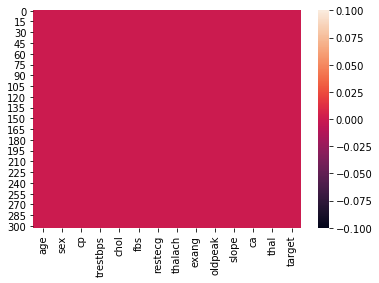

In [0]:
sns.heatmap(data.isna())

In [0]:
import missingno as mis

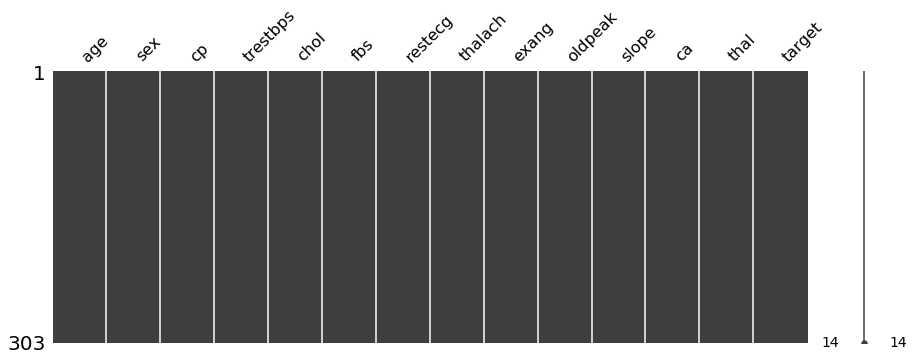

In [0]:
mis.matrix(data, figsize=(15, 5))

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:280: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:280: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


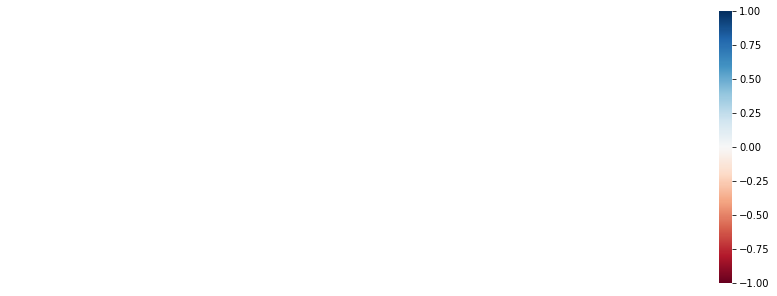

In [0]:
mis.heatmap(data, figsize=(15, 5))

Analyzing Heart Disease Dataset

In [0]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Number of people with Heart Disease: 165

Number of people which do not have Heart Disease: 138

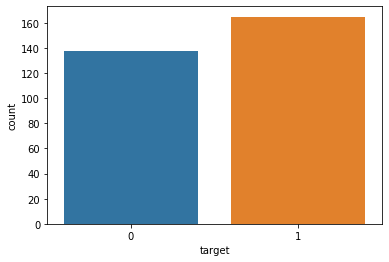

In [0]:
sns.countplot(x='target', data=data)

Text(0.5, 0, 'Age')

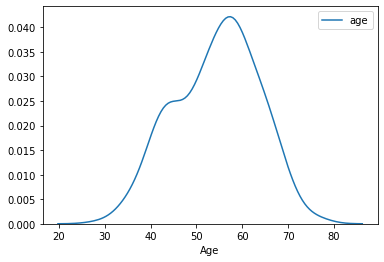

In [0]:
sns.kdeplot(data['age'])
plt.xlabel('Age')

The maximum number of people suffering from Heart Disease are in the age group (55-60).

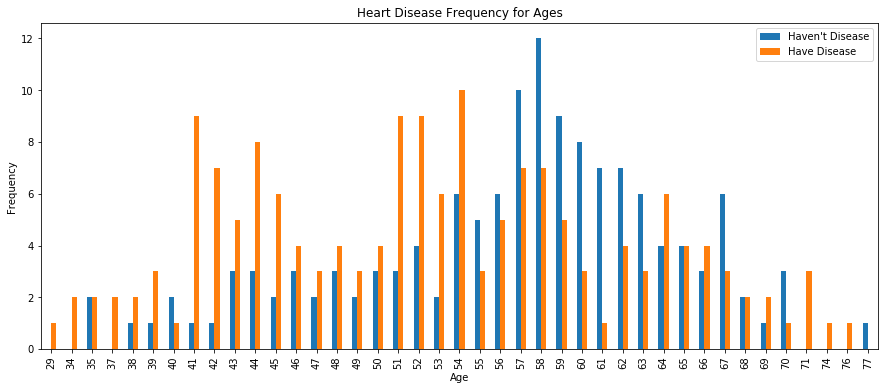

In [0]:
data.groupby(data['age']).target.value_counts().unstack().plot(kind = 'bar',figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Haven't Disease",'Have Disease'])

Text(0, 0.5, 'Frequency')

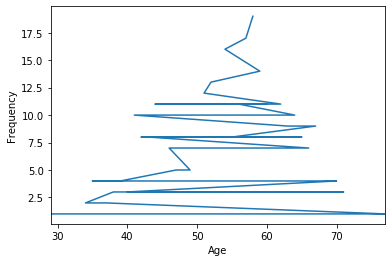

In [0]:
data['age'].value_counts().plot()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.shape

(303, 14)

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Attributes Information**

1.   age (in years)
2.   sex (1 = male; 0 = female)
3.   chest pain type (4 values)
4.   resting blood pressure
5.   serum cholestoral in mg/dl
6.   fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7.   resting electrocardiographic results (values 0,1,2)
8.   maximum heart rate achieved
9.   exercise induced angina (1 = yes; 0 = no)
10.  oldpeak = ST depression induced by exercise relative to rest
11.  the slope of the peak exercise ST segment
12.  number of major vessels (0-3) colored by flourosopy
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



***Target Variable***

target = 1 (presence of Heart Diseases)
target = 0 (absence of Heart Diseases)

**SPLITTING THE DATASET IN TRAIN & TEST**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
target = data.iloc[:,-1]
df = data.iloc[:, :-1]
pd.DataFrame(target, columns=['target'])

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [0]:
train_data, test_data, train_label, test_label = train_test_split(df, target, random_state=0)

In [0]:
train_data.shape

(227, 13)

In [0]:
test_data.shape

(76, 13)

**CLASSIFICATION ALGORITHMS**

***DECISION TREES***

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
dtc_pred = dtc.predict(test_data)

In [0]:
dtc_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [0]:
unique, counts = np.unique(dtc_pred, return_counts=True)
dict(zip(unique, counts))

{0: 31, 1: 45}

In [0]:
unique, counts = np.unique(np.array(test_label), return_counts=True)
dict(zip(unique, counts))

{0: 33, 1: 43}

In [0]:
print('Accuracy of our Decision Tree Classifier is: ', accuracy_score(dtc_pred, test_label))

Accuracy of our Decision Tree Classifier is:  0.7894736842105263


In [0]:
print('Confusion Matrix: \n', confusion_matrix(dtc_pred, test_label))

Confusion Matrix: 
 [[24  7]
 [ 9 36]]


In [0]:
print('Classification Report: \n', classification_report(dtc_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        31
           1       0.84      0.80      0.82        45

    accuracy                           0.79        76
   macro avg       0.78      0.79      0.78        76
weighted avg       0.79      0.79      0.79        76



Text(33.0, 0.5, 'Actual Class')

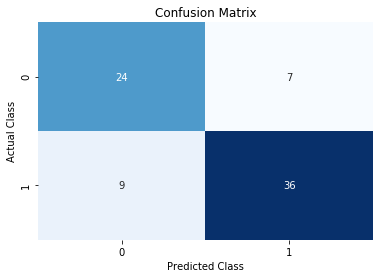

In [0]:
dtc_cm = confusion_matrix(dtc_pred, test_label)
sns.heatmap(dtc_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')



*   Precision 0.73 of Class '0' implies that out of all predicted instances of Class '0', 73% instances are correctly predicted as Class '0',
*   Recall 0.77 of Class '0' implies that out of all actual instances of Class '0', 77% instances are correctly predicted as Class '0'.
*   F1 Score = 2*(Recall * Precision) / (Recall + Precision)




Visualizing Decision Tree


In [0]:
from sklearn import tree
import graphviz

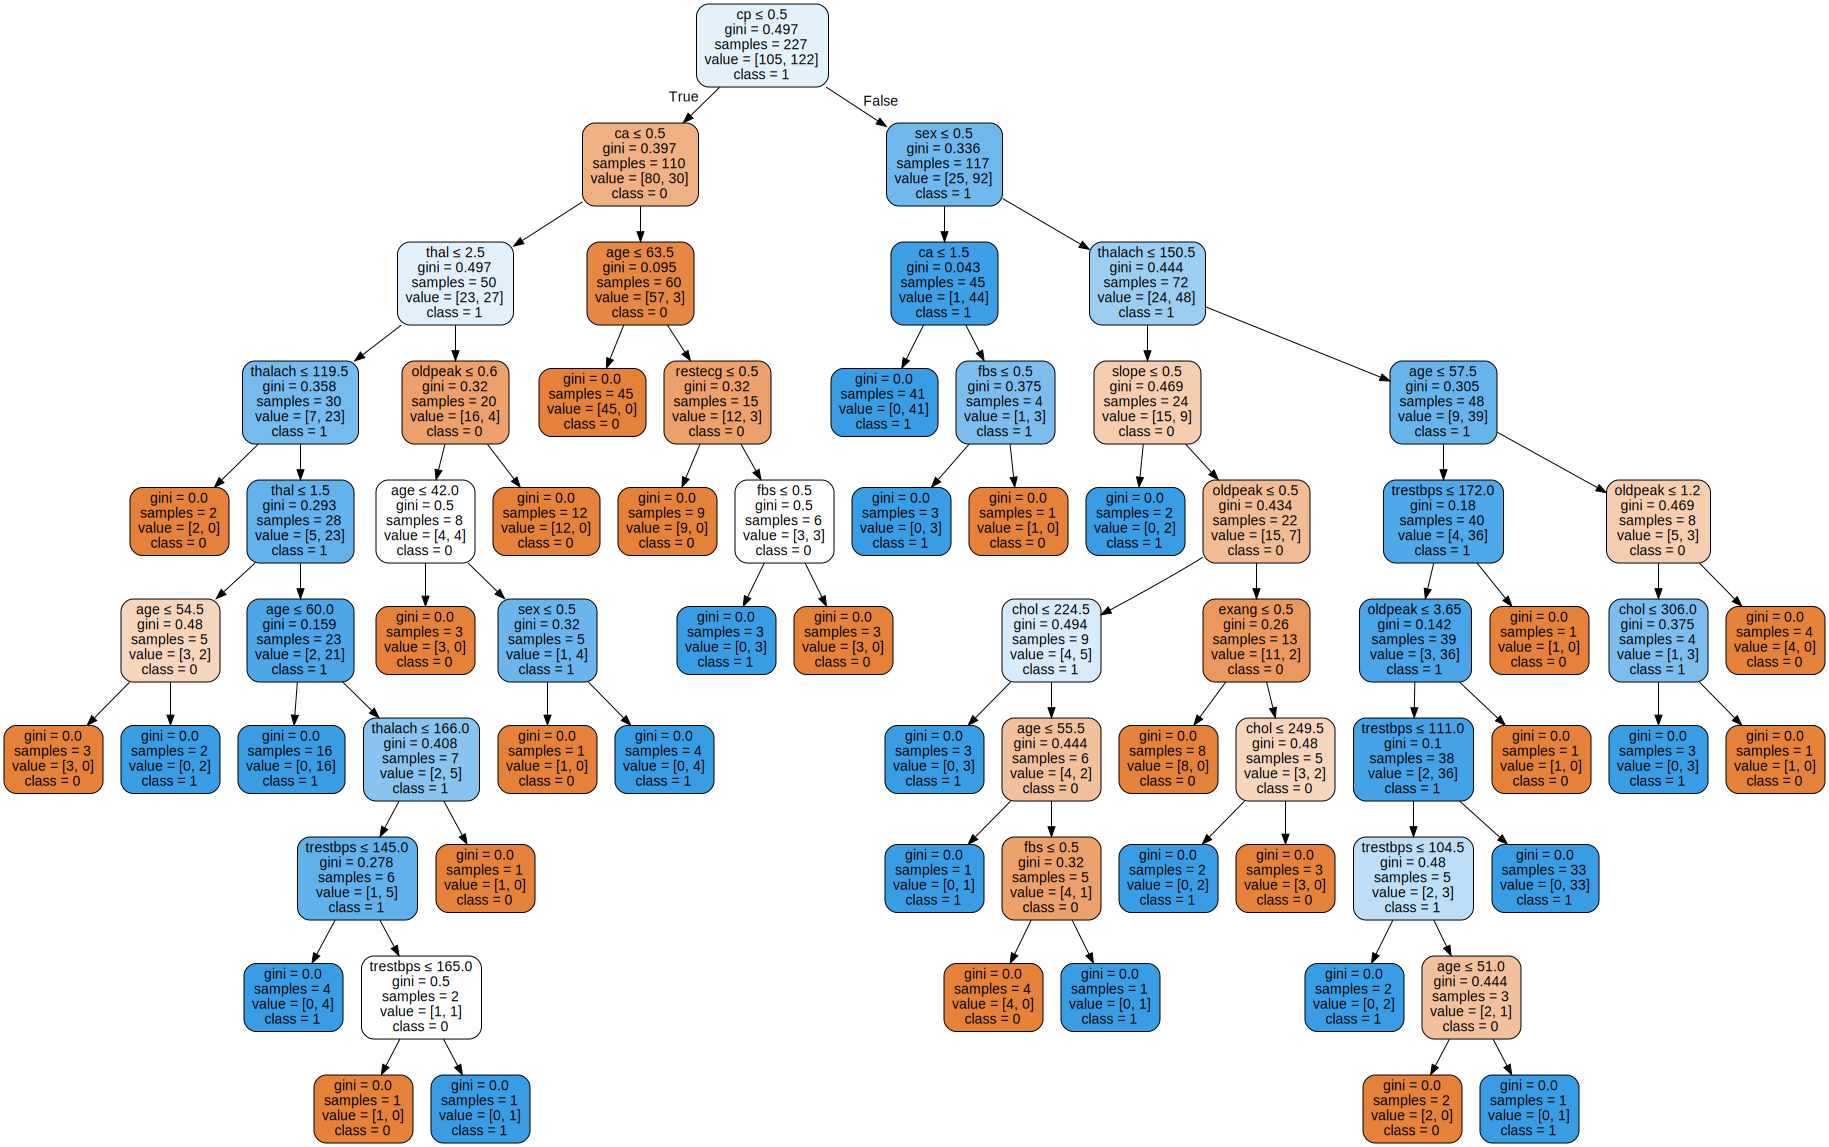

In [0]:
dot_data = tree.export_graphviz(dtc, feature_names=df.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

***K-Nearset Neighbour***

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Running KNN for different values of 'K' to check for maximum Accuracy

In [0]:
accuracy_list=[]
for k in range (1, 25):
  knnf = KNeighborsClassifier(n_neighbors=k)
  knnf.fit(train_data, train_label)
  knnf_pred = knnf.predict(test_data)
  print("Accuracy of our KNN model for K value %d is: " % (k), accuracy_score(knnf_pred, test_label))
  accuracy_list.append(accuracy_score(knnf_pred, test_label))

Accuracy of our KNN model for K value 1 is:  0.5263157894736842
Accuracy of our KNN model for K value 2 is:  0.618421052631579
Accuracy of our KNN model for K value 3 is:  0.6578947368421053
Accuracy of our KNN model for K value 4 is:  0.6842105263157895
Accuracy of our KNN model for K value 5 is:  0.6447368421052632
Accuracy of our KNN model for K value 6 is:  0.6447368421052632
Accuracy of our KNN model for K value 7 is:  0.6710526315789473
Accuracy of our KNN model for K value 8 is:  0.6578947368421053
Accuracy of our KNN model for K value 9 is:  0.6710526315789473
Accuracy of our KNN model for K value 10 is:  0.6842105263157895
Accuracy of our KNN model for K value 11 is:  0.7105263157894737
Accuracy of our KNN model for K value 12 is:  0.6842105263157895
Accuracy of our KNN model for K value 13 is:  0.6973684210526315
Accuracy of our KNN model for K value 14 is:  0.6973684210526315
Accuracy of our KNN model for K value 15 is:  0.6973684210526315
Accuracy of our KNN model for K val

In [0]:
print(max(accuracy_list))

0.7105263157894737


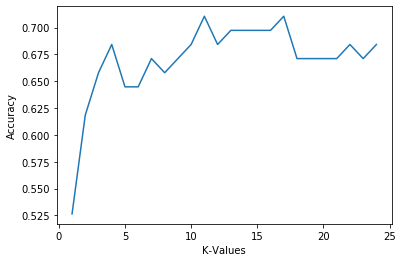

In [0]:
plt.plot(np.arange(1, 25, 1), accuracy_list)
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.show()

Thus, we get k=11 for maximum accuracy

In [0]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_data, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
knn_pred = knn.predict(test_data)
knn_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [0]:
print('Accuracy of our KNN Classifier is: ', accuracy_score(knn_pred, test_label))

Accuracy of our KNN Classifier is:  0.7105263157894737


In [0]:
print('Confusion Matrix: \n', confusion_matrix(knn_pred, test_label))

Confusion Matrix: 
 [[20  9]
 [13 34]]


In [0]:
print('Classification Report: \n', classification_report(knn_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.69      0.65        29
           1       0.79      0.72      0.76        47

    accuracy                           0.71        76
   macro avg       0.70      0.71      0.70        76
weighted avg       0.72      0.71      0.71        76



Text(33.0, 0.5, 'Actual Class')

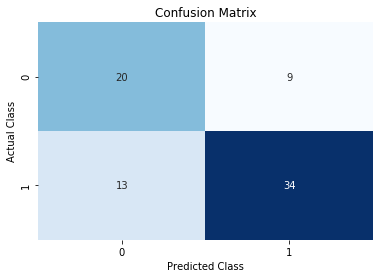

In [0]:
knn_cm = confusion_matrix(knn_pred, test_label)
sns.heatmap(knn_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

*   Precision 0.61 of Class '0' implies that out of all predicted instances of Class '0', 61% instances are correctly predicted as Class '0',
*   Recall 0.69 of Class '0' implies that out of all actual instances of Class '0', 69% instances are correctly predicted as Class '0'.
*   F1 Score = 2*(Recall * Precision) / (Recall + Precision)

***Logistic Regression***

In [0]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=0, C=1.0)
lrc.fit(train_data, train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lrc_pred = lrc.predict(test_data)
lrc_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [0]:
print('Accuracy of our Logistic Regression Classifier is: ', accuracy_score(lrc_pred, test_label))

Accuracy of our Logistic Regression Classifier is:  0.8421052631578947


In [0]:
print('Confusion Matrix: \n', confusion_matrix(lrc_pred, test_label))

Confusion Matrix: 
 [[24  3]
 [ 9 40]]


In [0]:
print('Classification Report: \n', classification_report(lrc_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.93      0.82      0.87        49

    accuracy                           0.84        76
   macro avg       0.83      0.85      0.83        76
weighted avg       0.86      0.84      0.84        76



Text(33.0, 0.5, 'Actual Class')

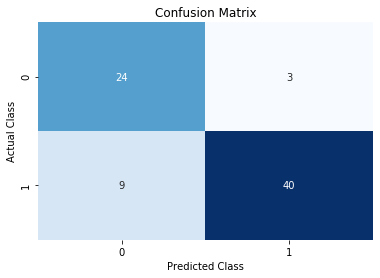

In [0]:
lrc_cm = confusion_matrix(lrc_pred, test_label)
sns.heatmap(lrc_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

*   Precision 0.73 of Class '0' implies that out of all predicted instances of Class '0', 73% instances are correctly predicted as Class '0',
*   Recall 0.89 of Class '0' implies that out of all actual instances of Class '0', 89% instances are correctly predicted as Class '0'.
*   F1 Score = 2*(Recall * Precision) / (Recall + Precision)

***SUPPORT VECTOR MACHINE***

In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_data, train_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svc_pred = svc.predict(test_data)
svc_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [0]:
print('Accuracy of our Logistic Regression Classifier is: ', accuracy_score(svc_pred, test_label))

Accuracy of our Logistic Regression Classifier is:  0.6842105263157895


In [0]:
print('Confusion Matrix: \n', confusion_matrix(svc_pred, test_label))

Confusion Matrix: 
 [[15  6]
 [18 37]]


In [0]:
print('Classification Report: \n', classification_report(svc_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.71      0.56        21
           1       0.86      0.67      0.76        55

    accuracy                           0.68        76
   macro avg       0.66      0.69      0.66        76
weighted avg       0.75      0.68      0.70        76



Text(33.0, 0.5, 'Actual Class')

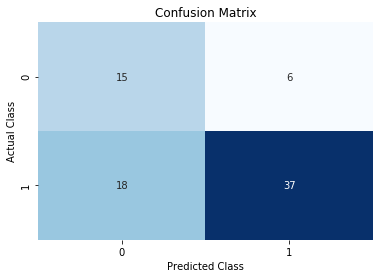

In [0]:
svc_cm = confusion_matrix(svc_pred, test_label)
sns.heatmap(svc_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

*   Precision 0.45 of Class '0' implies that out of all predicted instances of Class '0', 45% instances are correctly predicted as Class '0',
*   Recall 0.71 of Class '0' implies that out of all actual instances of Class '0', 71% instances are correctly predicted as Class '0'.
*   F1 Score = 2*(Recall * Precision) / (Recall + Precision)

### **ENSEMBLE LEARNING ALGORITHM**

***RANDOM FOREST ALGORITHM***

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(train_data, train_label) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rfc_pred = rfc.predict(test_data)
rfc_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [0]:
print('Accuracy of our Random Forest Classifier is: ', accuracy_score(rfc_pred, test_label))

Accuracy of our Random Forest Classifier is:  0.8157894736842105


In [0]:
print('Confusion Matrix: \n', confusion_matrix(rfc_pred, test_label))

Confusion Matrix: 
 [[27  8]
 [ 6 35]]


In [0]:
print('Classification Report: \n', classification_report(rfc_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.81      0.85      0.83        41

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



Text(33.0, 0.5, 'Actual Class')

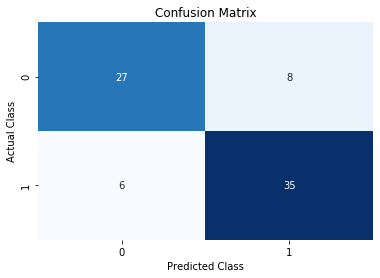

In [0]:
rfc_cm = confusion_matrix(rfc_pred, test_label)
sns.heatmap(rfc_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

*   Precision 0.82 of Class '0' implies that out of all predicted instances of Class '0', 82% instances are correctly predicted as Class '0',
*   Recall 0.77 of Class '0' implies that out of all actual instances of Class '0', 77% instances are correctly predicted as Class '0'.

***VISUALIZING RANDOM FOREST***

In [0]:
rfc.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [0]:
from sklearn import tree

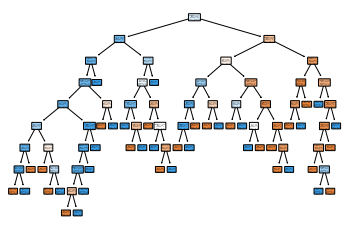

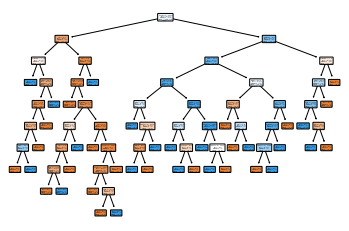

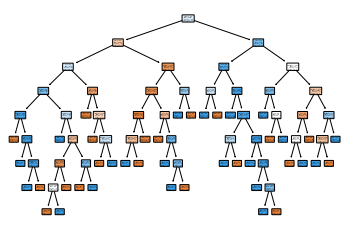

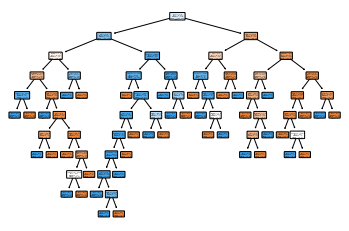

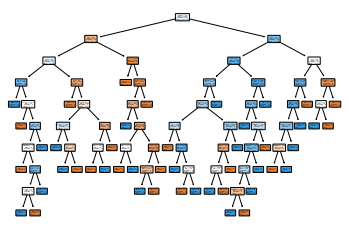

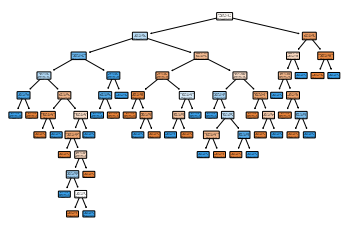

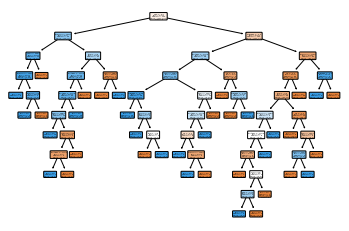

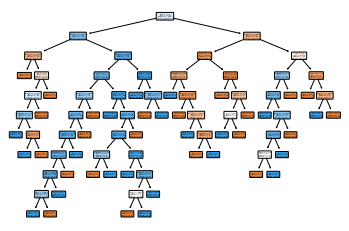

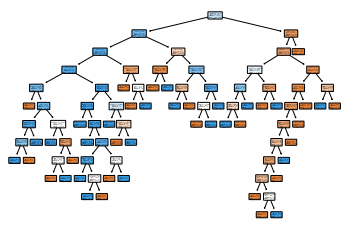

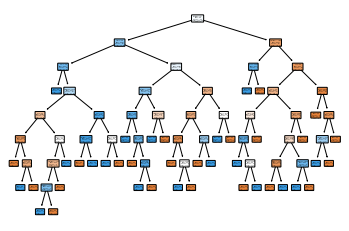

In [0]:
for i in range(0,10):
  tree.plot_tree(rfc.estimators_[i], feature_names=data.columns, class_names=['0', '1'], rounded=True, filled=True)
  plt.show()

***XGBoost Algorithm***

It is an advanced version of Gradient Boosting


In [0]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(train_data, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred = xgbc.predict(test_data)
xgb_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [0]:
print('Accuracy of our XGBoost Classifier is: ', accuracy_score(xgb_pred, test_label))

Accuracy of our XGBoost Classifier is:  0.8289473684210527


In [0]:
print('Confusion Matrix: \n', confusion_matrix(xgb_pred, test_label))

Confusion Matrix: 
 [[25  5]
 [ 8 38]]


In [0]:
print('Classification Report: \n', classification_report(xgb_pred, test_label))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.83      0.79        30
           1       0.88      0.83      0.85        46

    accuracy                           0.83        76
   macro avg       0.82      0.83      0.82        76
weighted avg       0.83      0.83      0.83        76



Text(33.0, 0.5, 'Actual Class')

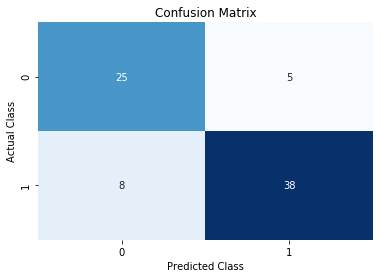

In [0]:
xgb_cm = confusion_matrix(xgb_pred, test_label)
sns.heatmap(xgb_cm, cbar=None, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

*   Precision 0.76 of Class '0' implies that out of all predicted instances of Class '0', 76% instances are correctly predicted as Class '0',
*   Recall 0.83 of Class '0' implies that out of all actual instances of Class '0', 83% instances are correctly predicted as Class '0'.

### **ALGORITHM COMPARISON**

**ACCURACY**

**Elimentary Machine Learning**

1.   Decision Trees Algorithm = 0.7894736842105263
2.   K-Nearst Neighbour Algorithm = 0.7105263157894737
3.   Logistic Regression Algorithm = 0.8421052631578947
4.   Support Vector Machine Algorithm = 0.6842105263157895

**Ensemble Learning Machine Learning**

1.   Random Forest Classification Algorithm = 0.8157894736842105
2.   XGBoost Classification Algorithm = 0.8289473684210527


In [0]:
acc_list = [accuracy_score(dtc_pred, test_label), 
            accuracy_score(knn_pred, test_label), 
            accuracy_score(lrc_pred, test_label), 
            accuracy_score(svc_pred, test_label), 
            accuracy_score(rfc_pred, test_label), 
            accuracy_score(xgb_pred, test_label)]
acc_list

[0.7894736842105263,
 0.7105263157894737,
 0.8421052631578947,
 0.6842105263157895,
 0.8157894736842105,
 0.8289473684210527]

In [0]:
names = ['DTC', 'KNN', 'LRC', 'SVC', 'RFC', 'XGB']

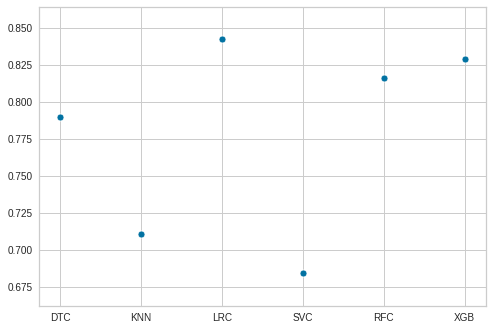

In [0]:
sns.scatterplot(x = names, y = acc_list )

Text(0.5, 1.0, 'Accuracy Graph')

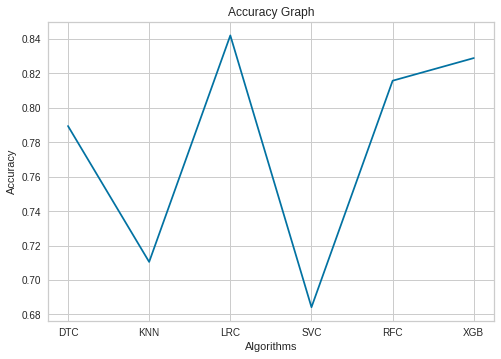

In [0]:
plt.plot(names, acc_list)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')